# Classification

### Setup

In [1]:
import sys
assert sys.version_info >= (3,5)

IS_COLAB = 'google.colab' in sys.modules
IS_KAGGLE = 'kaggle_secrets' in sys.modules

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#where to

In [2]:
from sklearn.datasets import load_digits

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print("keys:", mnist.keys())

'''
mnist = load_digits()
type(mnist)
mnist.keys()
'''

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


keys: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


'\nmnist = load_digits()\ntype(mnist)\nmnist.keys()\n'

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [4]:
for k in mnist.keys():
    print("####")
    print(k)
    print(mnist[k])

####
data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
####
target
['5' '0' '4' ... '4' '5' '6']
####
frame
None
####
categories
{}
####
feature_names
['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68'

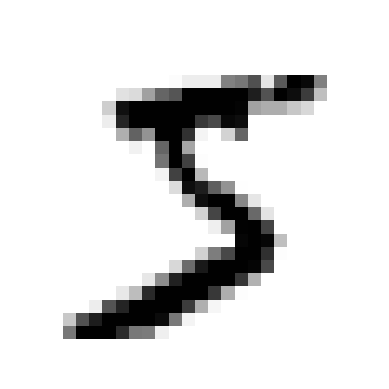

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt


def show_images(images, titles=None):
    n_images = len(images)
    if titles is None:
        titles = ["image %d" % i for i in range(1, n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(n_images, n_images, n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image.reshape(28, 28), cmap = "binary", interpolation='nearest')
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary", interpolation='nearest')
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

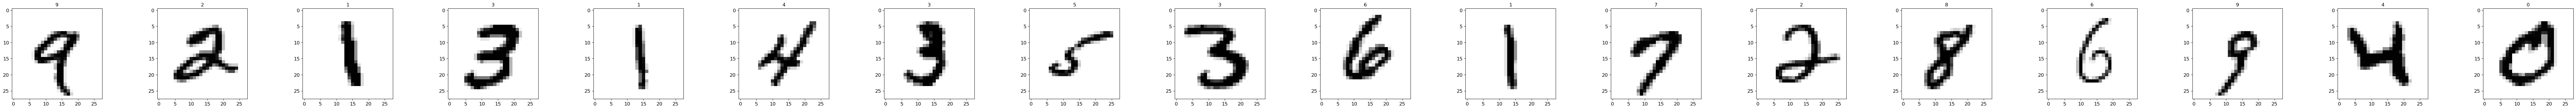

In [7]:
show_images(X[4:22], titles=y[4:22])

# Setting train and testing, data and label arrays

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

let's simply the problem and only try to identify 5

In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [10]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [11]:
type(y_train_5)

numpy.ndarray

### what is gradient descent?

### What is Stochastic gradient descent


In [12]:
import sklearn.linear_model


sgd_clf = sklearn.linear_model.SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

### implementing cross-validation

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)
# 3 cross validation folds
for train_index, test_index in skfolds.split(X_train, y_train_5):
    cole_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    cole_clf.fit(X_train_folds, y_train_folds)
    y_pred = cole_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))


0.9669
0.91625
0.96785


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # always guessing not 5
    

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

        predicted
        NN  |  NP            (Row,Column)
        PN  |  PP

        actual for Rows

In [20]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred),
recall_score(y_train_5, y_train_pred))

0.8370879772350012 0.6511713705958311


In [21]:
print(y_train_pred)
print(len(y_train))

[ True False False ...  True False False]
60000


In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)


[2164.22030239]


In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [25]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [26]:
print(precisions.shape, recalls.shape, thresholds.shape)


(60001,) (60001,) (60000,)


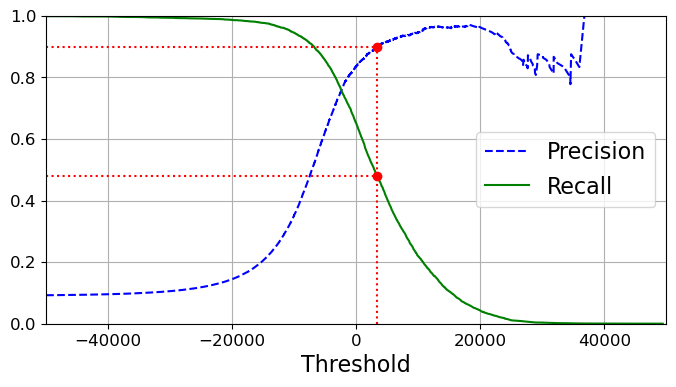

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()


#### ROC is a plot of true postives rate (TNR or recall) against false positce rate (FPR or FP/(total Negs))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


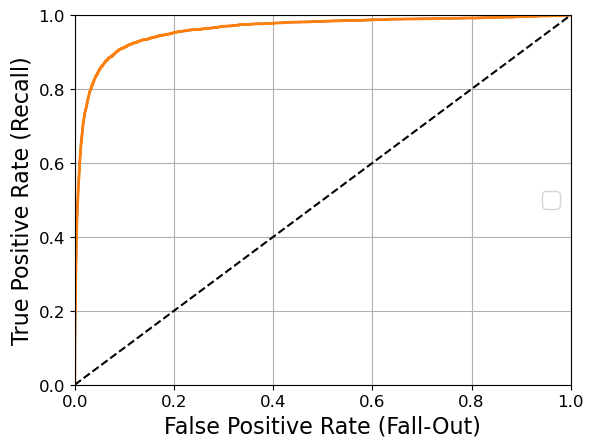

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,label = None)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend(loc="center right", fontsize=16)
    plt.grid(True)
    plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
    plt.ylabel("True Positive Rate (Recall)", fontsize=16)
    plt.axis([0, 1, 0, 1]) # [xmin, xmax, ymin, ymax]
    plt.show()
plot_roc_curve(fpr, tpr)
    

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#### Multclass Classifiers

In [30]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [31]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [32]:
np.argmax(some_digit_scores)


3

In [33]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

<h1>Error Analysis</h1>

In [35]:
# finding ways to improve promising models
# by analyzing the types of errors it makes

# look at confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx= confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

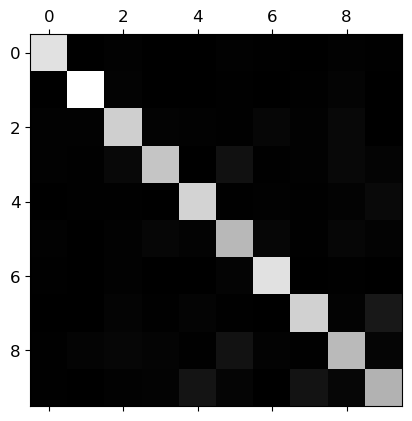

In [36]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

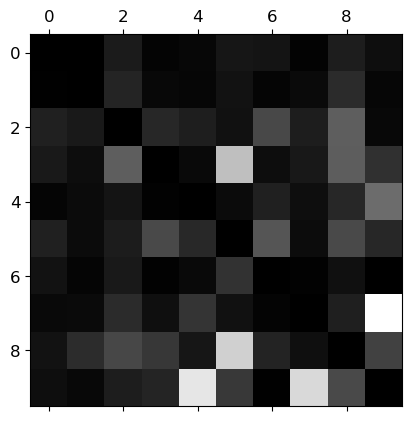

In [38]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0) # fill diagonal with zeros
plt.matshow(norm_conf_mx, cmap=plt.cm.gray) # errors stand out now
plt.show()

/var/folders/ky/lw_pyd454_145dm6qrhvyy9r0000gn/T/ipykernel_29236/1488016680.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
/var/folders/ky/lw_pyd454_145dm6qrhvyy9r0000gn/T/ipykernel_29236/1488016680.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
/var/folders/ky/lw_pyd454_145dm6qrhvyy9r0000gn/T/ipykernel_29236/1488016680.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
/var/folders/ky/lw_pyd454_145dm6qrhvyy9r0000gn/T/ipykernel_29236/1488016680.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementw

ZeroDivisionError: integer division or modulo by zero

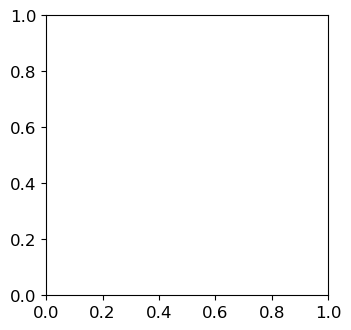

In [43]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // (images_per_row) + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


plt.figure(figsize=(8,8))
plt.subplot(221); 
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); 
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); 
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); 
plot_digits(X_bb[:25], images_per_row=5)
#save_fig("error_analysis_digits_plot")
plt.show()


In [44]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print("keys:", mnist.keys())

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


keys: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


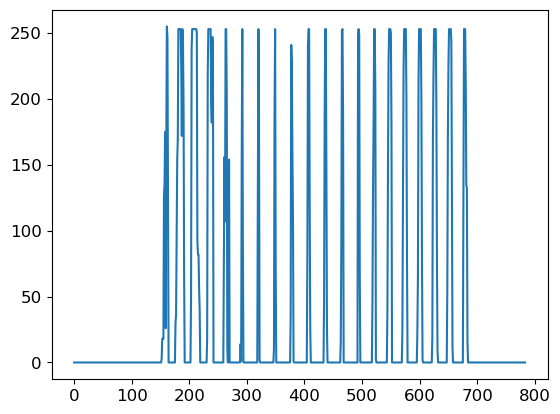

In [45]:
plt.plot(mnist.data[0])
plt.show()

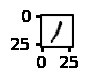

0 (784,)
1 (784,)
2 (784,)
3 (784,)
4 (784,)
5 (784,)
6 (784,)
7 (784,)
8 (784,)
9 (784,)
10 (784,)
11 (784,)
12 (784,)
13 (784,)
14 (784,)
15 (784,)
16 (784,)
17 (784,)
18 (784,)
19 (784,)
20 (784,)
21 (784,)
22 (784,)
23 (784,)
24 (784,)
25 (784,)
26 (784,)
27 (784,)
28 (784,)
29 (784,)
30 (784,)
31 (784,)
32 (784,)
33 (784,)
34 (784,)
35 (784,)
36 (784,)
37 (784,)
38 (784,)
39 (784,)
40 (784,)
41 (784,)
42 (784,)
43 (784,)
44 (784,)
45 (784,)
46 (784,)
47 (784,)
48 (784,)
49 (784,)
50 (784,)
51 (784,)
52 (784,)
53 (784,)
54 (784,)
55 (784,)
56 (784,)
57 (784,)
58 (784,)
59 (784,)
60 (784,)
61 (784,)
62 (784,)
63 (784,)
64 (784,)
65 (784,)
66 (784,)
67 (784,)
68 (784,)
69 (784,)
70 (784,)
71 (784,)
72 (784,)
73 (784,)
74 (784,)
75 (784,)
76 (784,)
77 (784,)
78 (784,)
79 (784,)
80 (784,)
81 (784,)
82 (784,)
83 (784,)
84 (784,)
85 (784,)
86 (784,)
87 (784,)
88 (784,)
89 (784,)
90 (784,)
91 (784,)
92 (784,)
93 (784,)
94 (784,)
95 (784,)
96 (784,)
97 (784,)
98 (784,)
99 (784,)


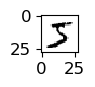

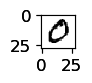

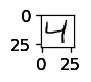

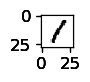

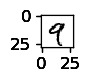

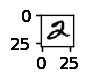

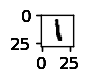

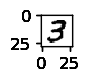

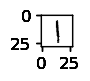

In [68]:


def show_image(images):
    fig = plt.figure()
   
    
    for n, (image) in enumerate(images):

        a = fig.add_subplot(len(images), len(images), 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image.reshape(28, 28), cmap = "binary", interpolation='nearest')
    fig.set_size_inches(np.array(fig.get_size_inches()) * len(images)*0.1)
    plt.show()

show_image(mnist.data[0:100])
for n, (image) in enumerate(mnist.data[0:100]):
    print(n, image.shape)

for i in range(1,10):
    show_image(mnist.data[0:i])

In [69]:
clf = KNeighborsClassifier()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
total_right = 0
total_wrong = 0
for n , (input, output) in enumerate(zip(X_test, y_test)):
    pred = clf.predict([input])
    if pred == output:
        total_right += 1
    else:
        total_wrong += 1
print(total_right/(total_right+total_wrong))

0.9688


In [80]:
"""
# 16 hour code

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

"""

'\n# 16 hour code\n\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = [{\'weights\': ["uniform", "distance"], \'n_neighbors\': [3, 4, 5]}]\n\nknn_clf = KNeighborsClassifier()\ngrid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)\ngrid_search.fit(X_train, y_train)\n\nprint(grid_search.best_params_)\nprint(grid_search.best_score_)\n\nfrom sklearn.metrics import accuracy_score\n\ny_pred = grid_search.predict(X_test)\naccuracy_score(y_test, y_pred)\n\n'

In [87]:
def shift_reshape_image(image, dx, dy):

    def shift_x(image, dx):
        if dx > 0:
            for r in range(28):
                for c in range(27 - dx - 1,0,-1):

                    print(image[])
                    image[r][c] = image[r][c + dx]

                image[r][0] = 0
        else:
            for r in range(28):
                for c in range(dx, 28-dx):
                    image[r][c] = image[r][c - dx]
                image[r][27] = 0

        return image
    

    def shift_y(image, dy):
        if dy > 0:
            for c in range(28):
                for r in range(27 - dy - 1,0,-1):
                    image[r][c] = image[r + dy][c]
                    
                image[0] = [0 for i in range(28)]
        else:
            for c in range(28):
                for r in range(dy, 28-dy):
                    image[r][c] = image[r - dy][c]

                image[27] = [0 for i in range(28)]
               
        return image


    shift_image = image.reshape((28, 28))
    print(shift_image.shape)
    print(shift_image[0][0])
    # shift by (dx, 0)
    if dx!=0:
        shift_image =shift_x(image, dx)

    # shift by (0, dy)
    if dy!=0:
        shift_image = shift_y(image, dy)

    return shift_image

shift_reshape_image(mnist.data[0], 1, 1)

(28, 28)
0.0


IndexError: invalid index to scalar variable.